# ML model 2

This model establishes relation between heartML.csv and the original datasets that describes the mortality on the basis of race using decision tree classifier

In [1]:
# 1. IMPORTS Done
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc
import matplotlib.colors as mcolors

In [2]:
# 2. Data :: Loading, reading, exploring

heartML2 = pd.read_csv("heartML2.csv")
print(heartML2.shape)
heartML2.info()
heartML2.head(10)

(245, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            244 non-null    object 
 1   Race                             245 non-null    object 
 2   Sum of Deaths per 10000 by Race  245 non-null    float64
 3   Output                           245 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.8+ KB


,State,Race,Sum of Deaths per 10000 by Race,Output
0,AK,American Indian and Alaskan Native,7237.5,0
1,AK,Asian and Pacific Islander,1945.2,0
2,AK,Black,2642.7,0
3,AK,Hispanic,520.3,0
4,AK,White,5234.4,0
5,AL,American Indian and Alaskan Native,1585.4,0
6,AL,Asian and Pacific Islander,5868.9,0
7,AL,Black,34818.3,1
8,AL,Hispanic,7724.3,0
9,AL,White,30424.8,1


In [3]:
# Drop columns that are not necessary for analysis
# Drop Age and Sex [Remainder: Reasons for Heart attack]

def removeC(tempDf, NotUsed):
    
    useCols = []
    data = {}
    for col in tempDf.columns:
        if col not in NotUsed:
            data[col] = tempDf[col]

    newDf = pd.DataFrame(data) 
    return newDf

heartMLNotUsed = ['State', 'Race']
heartML2 = removeC(heartML2, heartMLNotUsed)

In [4]:
heartML2.drop_duplicates(inplace=True)
print(sum(heartML2.duplicated()))

0


0    144
1    100
Name: Output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

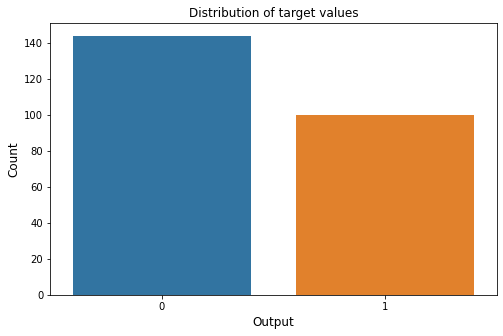

In [5]:
# barplot
print(heartML2['Output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heartML2['Output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

In [6]:
# Building the model
model = DecisionTreeClassifier()

In [7]:
# preprocessing the dataset
X = heartML2.iloc[:,heartML2.columns != 'Output']
y = heartML2.Output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

# standard scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test)

In [8]:
# Training the model
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

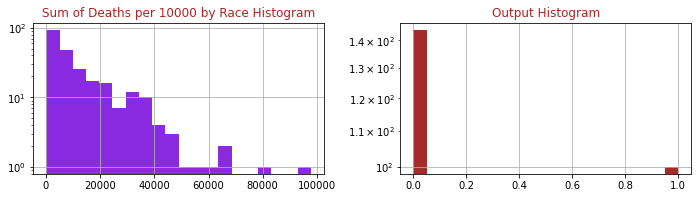

In [10]:
# Histograms

colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(heartML2,heartML2.columns,8,4)

In [28]:
# Evaluating the training set
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 100.0


In [29]:
# Evaluating on test set
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 40.816326530612244


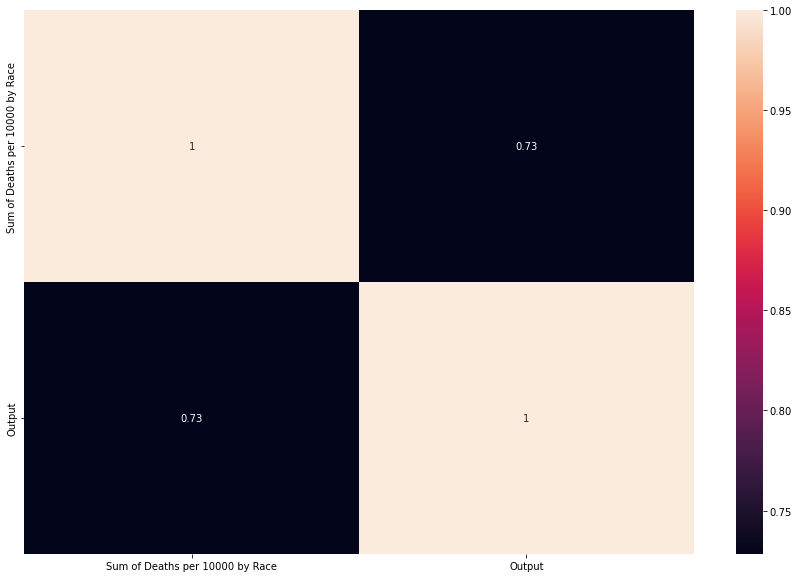

In [11]:
# heat map
plt.figure(figsize = (15,10))
sns.heatmap(heartML2.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [30]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.41      1.00      0.58        20

    accuracy                           0.41        49
   macro avg       0.20      0.50      0.29        49
weighted avg       0.17      0.41      0.24        49



/Users/sanketpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanketpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanketpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


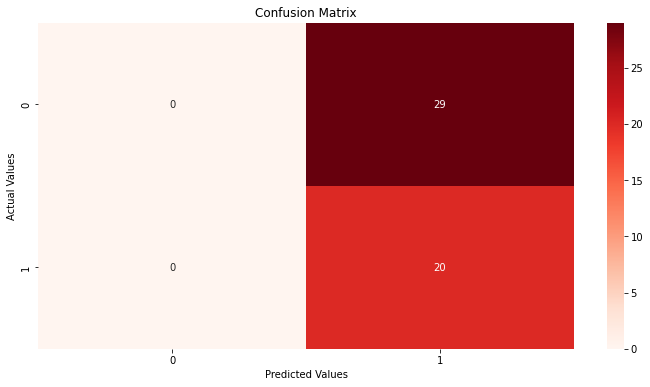

In [12]:
# confusion matrix

# confusion matrix

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')